In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats
from statsmodels.tsa.api import VAR
from scipy.stats import skew, kurtosis
from arch import arch_model
from IPython.display import display

Q1

In [244]:
trade_dfpath = '/Users/markoshea/Desktop/Working Directories/Datasets/tradedata.xls'
trade_df = pd.read_excel(trade_dfpath)
trade_df

,dmidprice,dur,x
0,0.015,16.427192,-1
1,-0.050,6.335282,-1
2,-0.230,16.301404,-1
3,0.230,3.706191,1
4,0.000,1.570725,-1
...,...,...,...
32360,0.000,0.099358,-1
32361,-0.005,1.413881,-1
32362,-0.005,1.499012,-1
32363,-0.020,0.275784,-1


In [245]:
#fit VAR(1)
trade_model = VAR(trade_df)
trade_results = trade_model.fit(1) 

print(trade_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Feb, 2025
Time:                     10:41:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -5.97180
Nobs:                     32364.0    HQIC:                  -5.97392
Log likelihood:          -41069.6    FPE:                 0.00254173
AIC:                     -5.97491    Det(Omega_mle):      0.00254078
--------------------------------------------------------------------
Results for equation dmidprice
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000118         0.000237            0.497           0.619
L1.dmidprice        -0.275693         0.005515          -49.990           0.000
L1.dur               0.000053         0.000127            0.

          dmidprice           dur             x
count  3.236400e+04  3.236400e+04  3.236400e+04
mean  -1.457245e-16  5.901430e-16 -1.650995e-15
std    3.605991e-02  1.554123e+00  9.161128e-01
min   -5.384969e-01 -8.865164e+00 -3.294639e+00
25%   -6.027526e-03 -8.162783e-01 -6.457095e-01
50%   -3.829184e-04 -5.226044e-01  4.105587e-01
75%    6.782555e-03  2.471387e-01  6.215045e-01
max    4.525804e-01  5.382295e+01  4.044820e+00


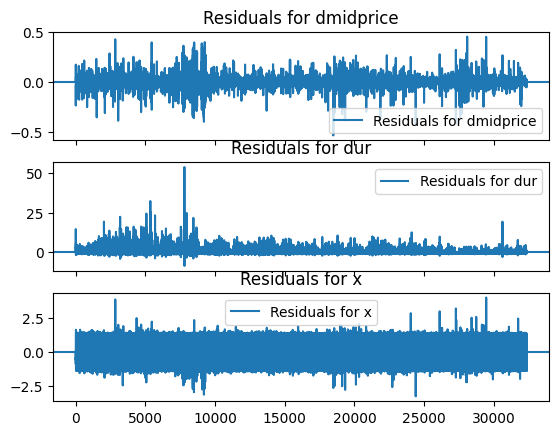

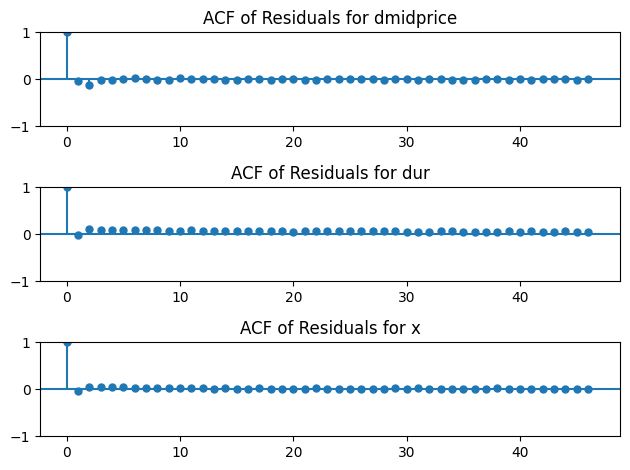

In [246]:
#residual diagnostics
trade_residuals = trade_results.resid
print(trade_residuals.describe()) 

fig, axes = plt.subplots(3, 1, sharex=True)
variables = ['dmidprice', 'dur', 'x']

for i, var in enumerate(variables):
    axes[i].plot(trade_residuals[var], label=f'Residuals for {var}')
    axes[i].axhline(0)
    axes[i].set_title(f'Residuals for {var}')
    axes[i].legend()

fig, axes = plt.subplots(3, 1)
for i, var in enumerate(variables):
    plot_acf(trade_residuals[var], ax=axes[i], title=f'ACF of Residuals for {var}')

plt.tight_layout()
plt.show()

Q1 (b)

It seems like the model fits the data reasonably well, overall. From the ACF plots, it seems that there is no significant autocorrelation left. However, from the residual plots, especially the dmidprice plot, we see that heteroscedasticity may be an issue. We proceed by estimating VAR(2) and VAR(3) models and examining their fit.

In [247]:
#VAR(2)
results_var2 = trade_model.fit(2)  
print(results_var2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Feb, 2025
Time:                     10:41:56
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -6.00873
Nobs:                     32363.0    HQIC:                  -6.01243
Log likelihood:          -40424.1    FPE:                 0.00244388
AIC:                     -6.01417    Det(Omega_mle):      0.00244230
--------------------------------------------------------------------
Results for equation dmidprice
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000275         0.000260            1.059           0.290
L1.dmidprice        -0.302046         0.005622          -53.722           0.000
L1.dur               0.000031         0.000128            0.

In [248]:
#VAR(3)
results_var3 = trade_model.fit(3) 
print(results_var3.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Feb, 2025
Time:                     10:41:56
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -6.02368
Nobs:                     32362.0    HQIC:                  -6.02897
Log likelihood:          -40134.2    FPE:                 0.00240201
AIC:                     -6.03145    Det(Omega_mle):      0.00239978
--------------------------------------------------------------------
Results for equation dmidprice
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000207         0.000276            0.750           0.453
L1.dmidprice        -0.307631         0.005642          -54.521           0.000
L1.dur               0.000025         0.000129            0.

          dmidprice           dur             x
count  3.236300e+04  3.236300e+04  3.236300e+04
mean   1.708130e-16  5.058525e-16  3.995884e-15
std    3.581839e-02  1.540276e+00  9.110788e-01
min   -5.375299e-01 -7.841792e+00 -3.422223e+00
25%   -7.159910e-03 -7.654297e-01 -7.163262e-01
50%   -2.535029e-04 -5.018615e-01  3.507319e-01
75%    7.645752e-03  2.421002e-01  6.992636e-01
max    4.748336e-01  5.386283e+01  4.291998e+00


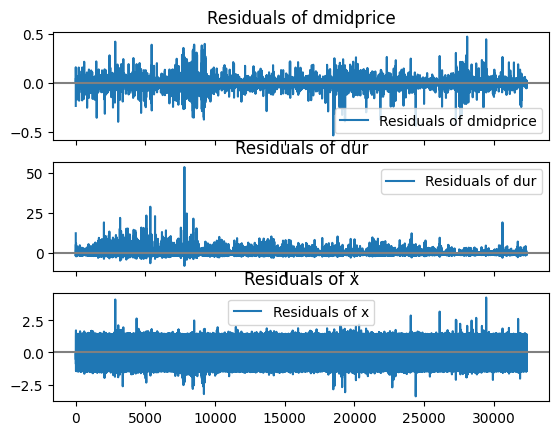

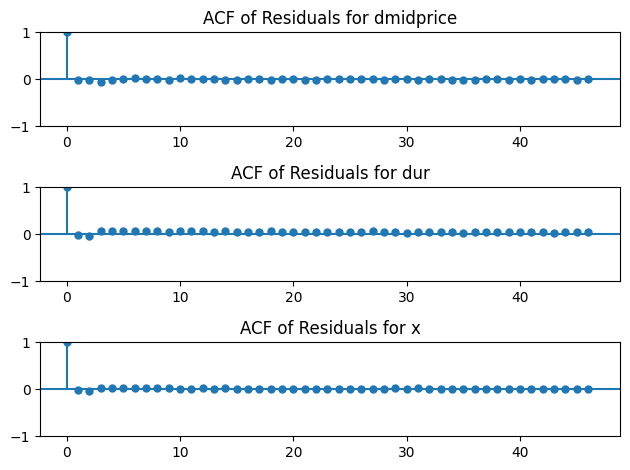

In [249]:
#var(2) residual diagnostics
trade_residuals2 = results_var2.resid
print(trade_residuals2.describe()) 

fig, axes = plt.subplots(3, 1, sharex=True)

for i, var in enumerate(variables):
    axes[i].plot(trade_residuals2[var], label=f'Residuals of {var}')
    axes[i].axhline(0, color='gray')
    axes[i].set_title(f'Residuals of {var}')
    axes[i].legend()

fig, axes = plt.subplots(3, 1)
for i, var in enumerate(variables):
    plot_acf(trade_residuals2[var], ax=axes[i], title=f'ACF of Residuals for {var}')

plt.tight_layout()
plt.show()

          dmidprice           dur             x
count  3.236200e+04  3.236200e+04  3.236200e+04
mean  -1.252594e-16  6.042314e-16 -3.015009e-15
std    3.574830e-02  1.531991e+00  9.094205e-01
min   -5.367232e-01 -6.947542e+00 -3.515640e+00
25%   -7.547343e-03 -7.537569e-01 -7.116447e-01
50%   -2.889951e-04 -4.881067e-01  3.441715e-01
75%    7.762555e-03  2.516475e-01  6.900546e-01
max    4.766440e-01  5.387641e+01  4.242724e+00


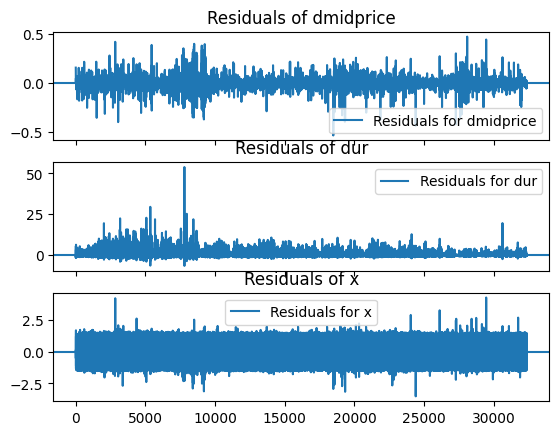

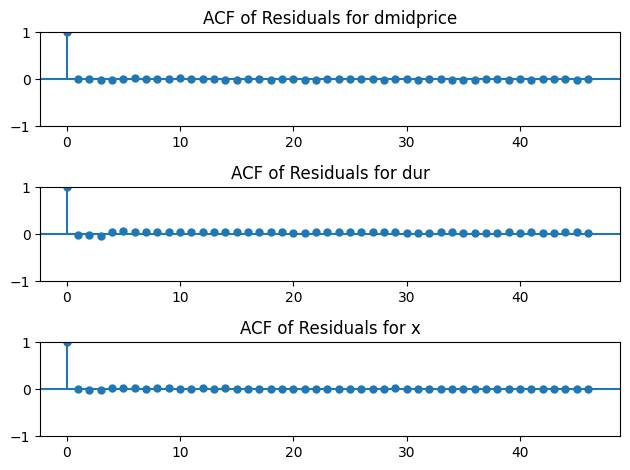

In [250]:
#var(3) residual diagnostics
trade_residuals3 = results_var3.resid
print(trade_residuals3.describe()) 

fig, axes = plt.subplots(3, 1, sharex=True)

for i, var in enumerate(variables):
    axes[i].plot(trade_residuals3[var], label=f'Residuals for {var}')
    axes[i].axhline(0)
    axes[i].set_title(f'Residuals of {var}')
    axes[i].legend()

fig, axes = plt.subplots(3, 1)
for i, var in enumerate(variables):
    plot_acf(trade_residuals3[var], ax=axes[i], title=f'ACF of Residuals for {var}')

plt.tight_layout()
plt.show()

Q1 (c)
Based on residual analysis, it seems like a VAR(3) model seems to smooth autocorrelation the most and the residuals seem slightly more stable. 

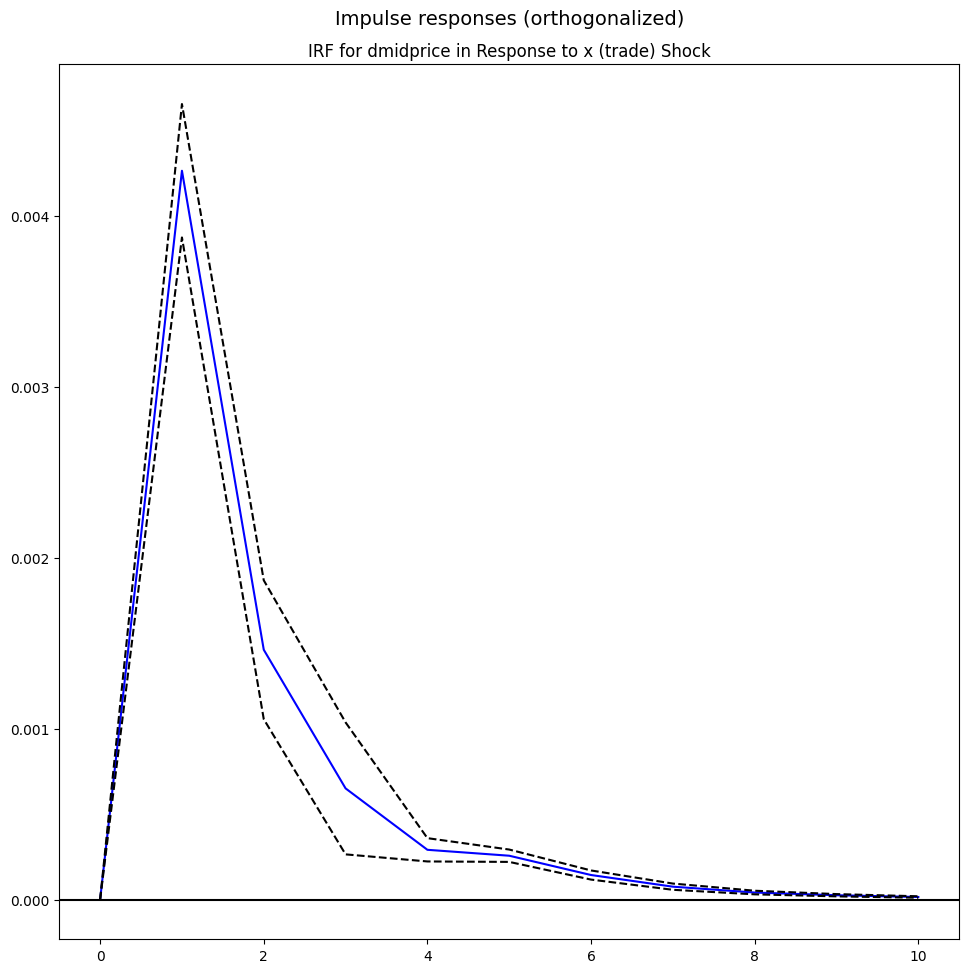

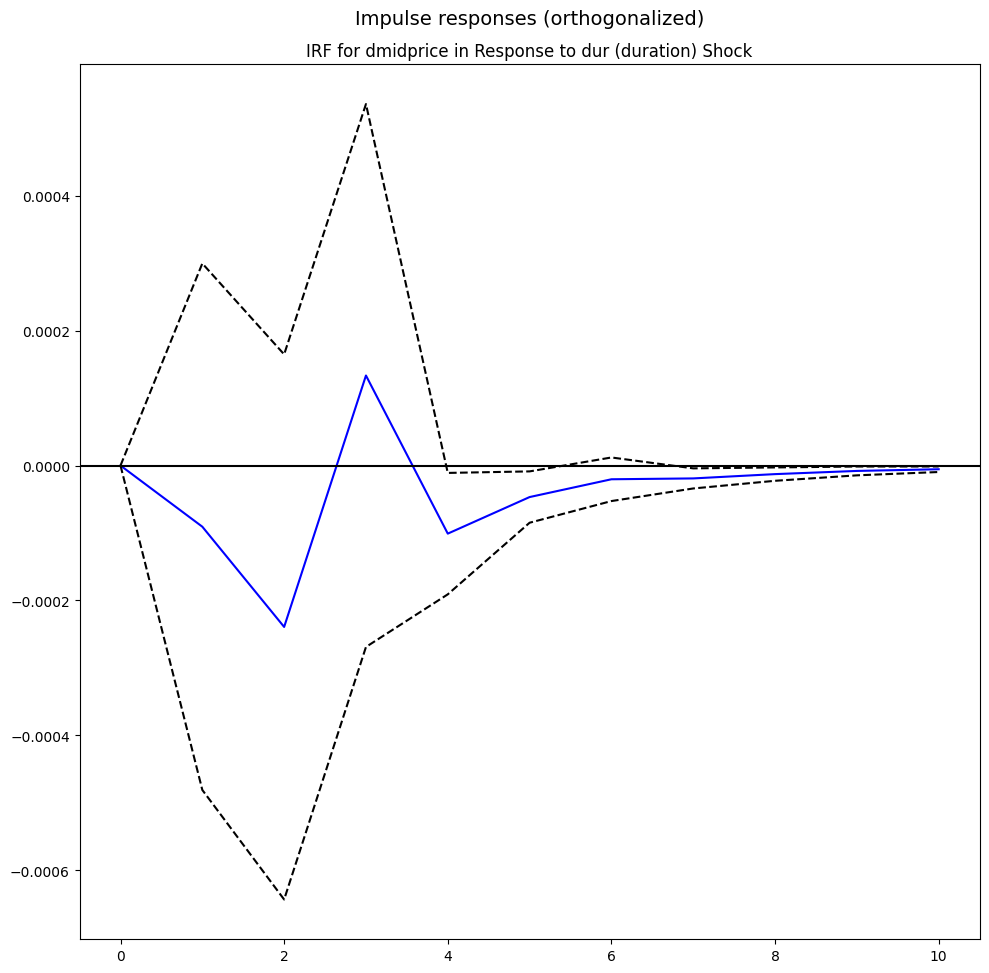

In [251]:
#compute IRF for dmidprice in response to trade and duration shocks
irf = results_var3.irf(10)

irf.plot(orth=True, impulse='x', response='dmidprice')
plt.title('IRF for dmidprice in Response to x (trade) Shock')

irf.plot(orth=True, impulse='dur', response='dmidprice')
plt.title('IRF for dmidprice in Response to dur (duration) Shock')
plt.show()

Q1 (d)
We see that the IRF for returns given a shock to the trade indicator (x) jumps in the positive direction, indicating that buyer-initiated trades (x=1) lead to an increase in prices (however, based on analysis immediately following, we find that this is actualy supposed to be negative, and hence a decrease in prices is actually expected). We see that it quickly returns to zero, suggesting that the market absorbs the marginal effect of a given shock quickly and is more efficient.

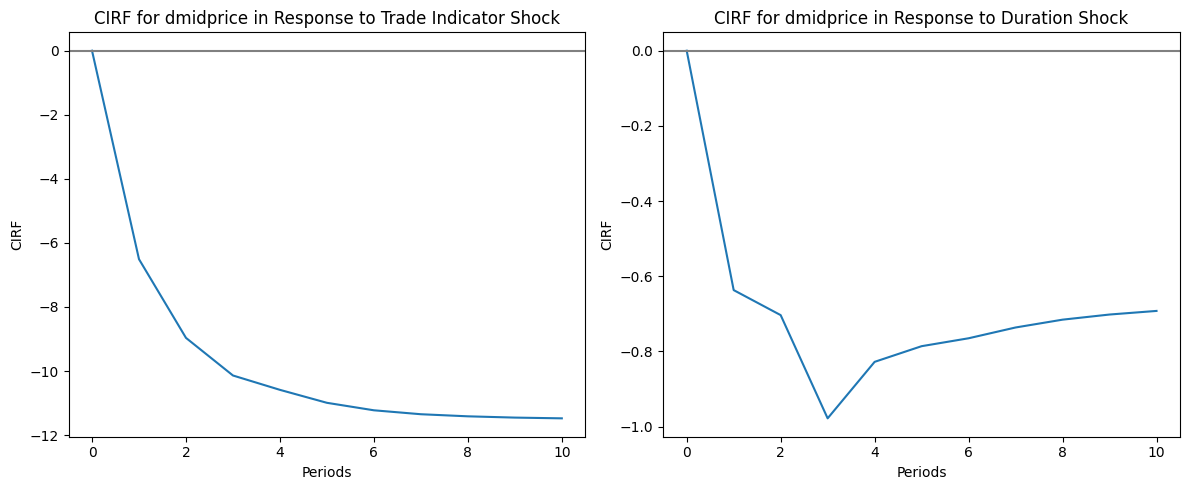

In [252]:
#extract IRF vals
irf_x_dmidprice = irf.irfs[:, trade_df.columns.get_loc('x'), trade_df.columns.get_loc('dmidprice')]
irf_dur_dmidprice = irf.irfs[:, trade_df.columns.get_loc('dur'), trade_df.columns.get_loc('dmidprice')]

#build CIRFs
cirf_x_dmidprice = np.cumsum(irf_x_dmidprice)
cirf_dur_dmidprice = np.cumsum(irf_dur_dmidprice)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#CIRF for x on dmidprice
ax[0].plot(cirf_x_dmidprice)
ax[0].axhline(0, color='gray')
ax[0].set_title('CIRF for dmidprice in Response to Trade Indicator Shock')
ax[0].set_xlabel('Periods')
ax[0].set_ylabel('CIRF')

#CIRF dur on dmidprice
ax[1].plot(cirf_dur_dmidprice)
ax[1].axhline(0, color='gray')
ax[1].set_title('CIRF for dmidprice in Response to Duration Shock')
ax[1].set_xlabel('Periods')
ax[1].set_ylabel('CIRF')

plt.tight_layout()
plt.show()

In [253]:
#determine signs of irf vals
print(irf.irfs[:, trade_df.columns.get_loc('x'), trade_df.columns.get_loc('dmidprice')])

[ 0.         -6.50784015 -2.45638754 -1.17395816 -0.44818343 -0.40456688
 -0.2337645  -0.12280643 -0.065269   -0.03972339 -0.0232583 ]


Q1 (e)
We see that the CIRF for dmidprice given a shock to the trade indicator (x) is a convave upwards decreasing function, suggesting that buyer-initiated trades (x=1) actualy lead to a long-lasting decrease in returns. This would appear to contradict our earlier finding that shocks briefly bump the price, based on the corresponding IRF. However, checking the raw values for the IRF, we find they are negative, meaning that buyer-led trades actually lead to decrease in returns. Thus, we conclude that the past negative shocks of buyer-led trades are quickly absorbed but the market does not quickly recover in the long-run.

Q2

In [254]:
#get eigenvals of matrix
A_lst = [[0.8, -0.1], [-0.1, 0.7]]
A = np.array(A_lst)

eigenvals = np.linalg.eigvals(A)
print("Eigenvalues:", eigenvals)

Eigenvalues: [0.8618034 0.6381966]


Q2 (a)
Since the eigenvalues of the matrix A are less than 1, the model is stationary

In [255]:
#get m terms in MA(infinity) representation
m = 5 
MA_matrices = []
A_power = np.eye(2) #A^0 = I

for i in range(m):
    MA_matrices.append(A_power.copy())  
    A_power = A @ A_power  #compute next power of A

for i, mat in enumerate(MA_matrices):
    print(f"A^{i}:")
    print(mat)

A^0:
[[1. 0.]
 [0. 1.]]
A^1:
[[ 0.8 -0.1]
 [-0.1  0.7]]
A^2:
[[ 0.65 -0.15]
 [-0.15  0.5 ]]
A^3:
[[ 0.535 -0.17 ]
 [-0.17   0.365]]
A^4:
[[ 0.445  -0.1725]
 [-0.1725  0.2725]]


Q2 (b)
We are given a VAR(1) model which can be represented as:

$$
Y_t = A Y_{t-1} + V_t
$$

We can lag this model to find:

$$
Y_{t-1} = A Y_{t-2} + V_{t-1}
$$

This implies:

$$
Y_t = A (A Y_{t-2} + V_{t-1}) + V_t = A^2 Y_{t-2} + A V_{t-1} + V_t
$$

We can follow this process to derive:

$$
Y_t = A^k Y_{t-k} + \sum_{j=0}^{k-1} A^j V_{t-j}
$$

Thus, as $k \to \infty$:

$$
Y_t = \sum_{j=0}^{\infty} A^j U_{t-j}
$$

The above code computes the first m (=5 now) terms of the MA(infinity representation). 

Q2 (c)

In [256]:
#params
n_per = 15

Omega_lst = [[9, 2], [2, 4]]
Omega = np.array(Omega_lst)

std_u = np.sqrt(Omega[0, 0])  
std_v = np.sqrt(Omega[1, 1]) 

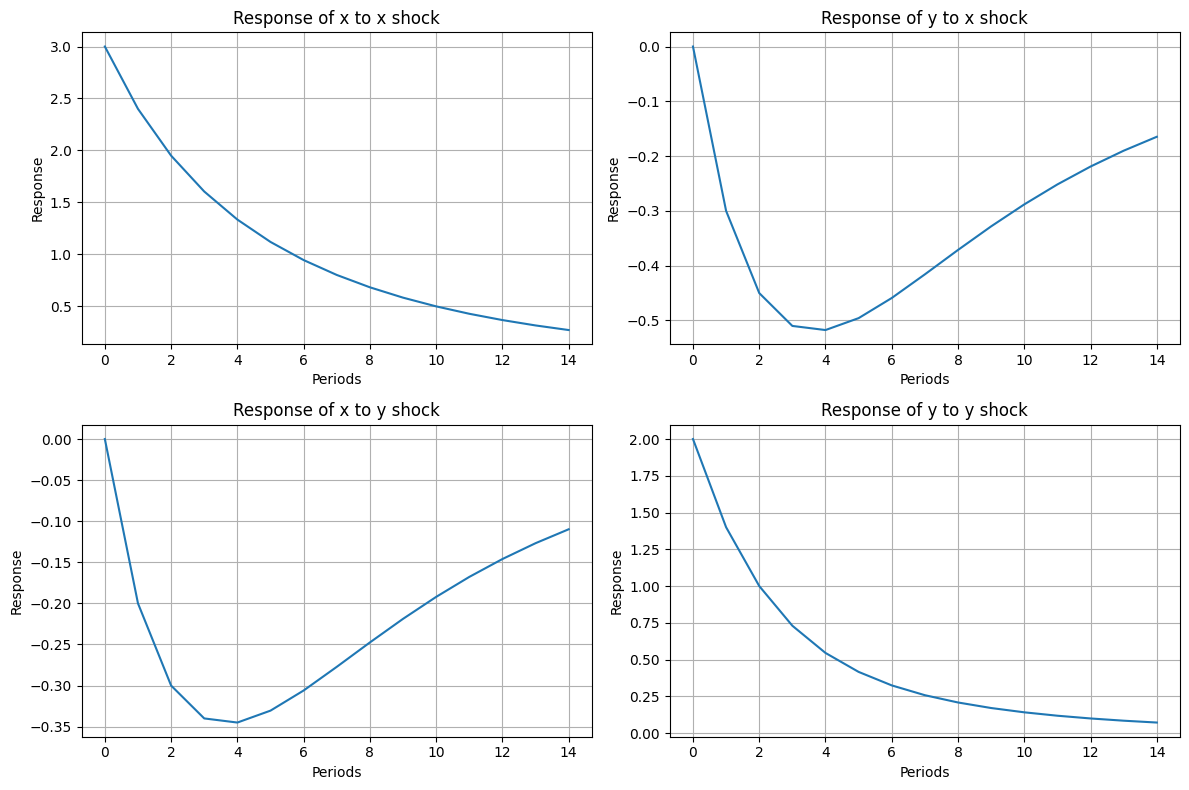

In [257]:
#compute IRFs for 15 periods
irf_x_x = np.zeros(n_per)  #x -> x
irf_x_y = np.zeros(n_per)  #x -> y
irf_y_x = np.zeros(n_per)  #y -> x
irf_y_y = np.zeros(n_per)  #y -> y

#get IRFs w A^k
A_power = np.eye(2)  

#responses
for k in range(n_per):
    irf_x_x[k] = A_power[0, 0] * std_u  
    irf_x_y[k] = A_power[1, 0] * std_u 
    irf_y_x[k] = A_power[0, 1] * std_v  
    irf_y_y[k] = A_power[1, 1] * std_v  
    
    A_power = A @ A_power  #next power of A

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

time = np.arange(n_per)

axs[0, 0].plot(time, irf_x_x)
axs[0, 0].set_title("Response of x to x shock")

axs[0, 1].plot(time, irf_x_y)
axs[0, 1].set_title("Response of y to x shock")

axs[1, 0].plot(time, irf_y_x)
axs[1, 0].set_title("Response of x to y shock")

axs[1, 1].plot(time, irf_y_y)
axs[1, 1].set_title("Response of y to y shock")

for ax in axs.flat:
    ax.set_xlabel("Periods")
    ax.set_ylabel("Response")
    ax.grid()

plt.tight_layout()
plt.show()

Q2 (d)

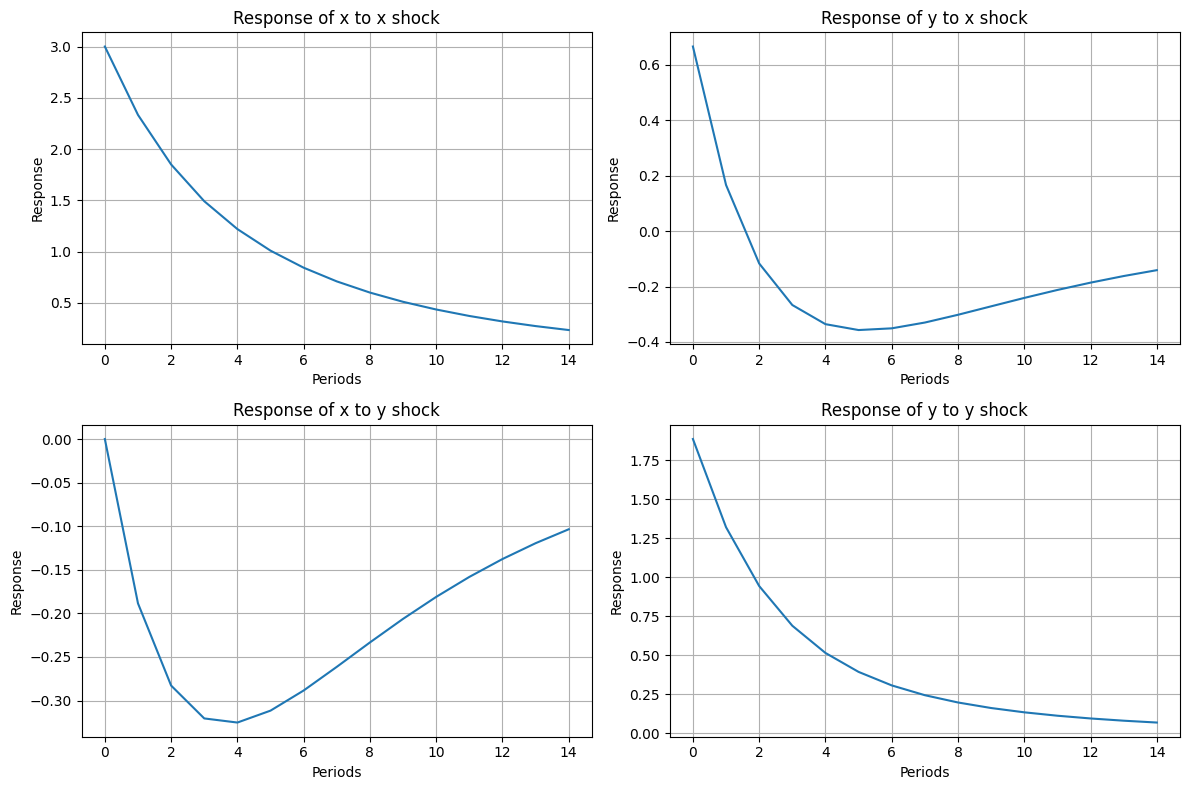

In [258]:
#compute IRFs for 15 periods w lower triangular orthogonalization
n_pers = 15

#lower triangular P
P = np.linalg.cholesky(Omega)

#initialize
orth_irf_x_x = np.zeros(n_pers)  #x -> x
orth_irf_x_y = np.zeros(n_pers)  #x -> y
orth_irf_y_x = np.zeros(n_pers)  #y -> x
orth_irf_y_y = np.zeros(n_pers)  #y -> y

#get IRFS w orthogonalized shocks
A_power = np.eye(2) 

for k in range(n_pers):
    response_matrix = A_power @ P  

    orth_irf_x_x[k] = response_matrix[0, 0]  
    orth_irf_x_y[k] = response_matrix[1, 0]  
    orth_irf_y_x[k] = response_matrix[0, 1]  
    orth_irf_y_y[k] = response_matrix[1, 1]  
    
    A_power = A @ A_power 

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

time = np.arange(n_pers)

axs[0, 0].plot(time, orth_irf_x_x)
axs[0, 0].set_title("Response of x to x shock")

axs[0, 1].plot(time, orth_irf_x_y)
axs[0, 1].set_title("Response of y to x shock")

axs[1, 0].plot(time, orth_irf_y_x)
axs[1, 0].set_title("Response of x to y shock")

axs[1, 1].plot(time, orth_irf_y_y)
axs[1, 1].set_title("Response of y to y shock")

for ax in axs.flat:
    ax.set_xlabel("Periods")
    ax.set_ylabel("Response")
    ax.grid()

plt.tight_layout()
plt.show()

Q3

In [259]:
#import datasets
earnings_path = '/Users/markoshea/Desktop/Working Directories/Datasets/AHETPI.csv'
earnings_df = pd.read_csv(earnings_path) 

cpi_path = '/Users/markoshea/Desktop/Working Directories/Datasets/CPIAUCSL.csv'
cpi_df = pd.read_csv(cpi_path) 

indpro_path = '/Users/markoshea/Desktop/Working Directories/Datasets/INDPRO.csv'
indpro_df = pd.read_csv(indpro_path) 

In [260]:
#convert to datetime
for df in [earnings_df, cpi_df, indpro_df]:
    df['observation_date'] = pd.to_datetime(df['observation_date'])

#merge dfs
trivar_df = earnings_df.merge(cpi_df, on='observation_date', how='inner')
trivar_df = trivar_df.merge(indpro_df, on='observation_date', how='inner')

trivar_df = trivar_df[trivar_df['observation_date'] >= '1964-01-01']
trivar_df.reset_index(drop=True, inplace=True)

In [261]:
#ln diff
trivar_df['monthly_inflation'] = np.log(trivar_df['CPIAUCSL']).diff()
trivar_df['indpro_growth'] = np.log(trivar_df['INDPRO']).diff()
trivar_df['wage_growth'] = np.log(trivar_df['AHETPI']).diff()

trivar_df.dropna(inplace=True)

trivar_df['observation_date'] = pd.to_datetime(trivar_df['observation_date'])
trivar_df.set_index('observation_date', inplace=True)

trivar_df = trivar_df.asfreq('MS')
trivar_df

,AHETPI,CPIAUCSL,INDPRO,monthly_inflation,indpro_growth,wage_growth
observation_date,,,,,,
1964-02-01,2.50,30.910,27.9291,-0.000970,0.006761,0.000000
1964-03-01,2.51,30.940,27.9291,0.000970,0.000000,0.003992
1964-04-01,2.52,30.950,28.3861,0.000323,0.016230,0.003976
1964-05-01,2.52,30.980,28.5474,0.000969,0.005666,0.000000
1964-06-01,2.53,31.010,28.6280,0.000968,0.002819,0.003960
...,...,...,...,...,...,...
2024-09-01,30.38,314.851,102.5873,0.002289,-0.004205,0.003627
2024-10-01,30.49,315.564,102.1219,0.002262,-0.004547,0.003614
2024-11-01,30.58,316.449,101.9736,0.002801,-0.001453,0.002947


In [262]:
#fit the VAR(1) model
var_data = trivar_df[['monthly_inflation', 'indpro_growth', 'wage_growth']]

var_model = VAR(var_data)
var_results = var_model.fit(maxlags=1)

print(var_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Feb, 2025
Time:                     10:42:02
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -33.1888
Nobs:                     731.000    HQIC:                  -33.2351
Log likelihood:           9058.34    FPE:                3.57708e-15
AIC:                     -33.2642    Det(Omega_mle):     3.51899e-15
--------------------------------------------------------------------
Results for equation monthly_inflation
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.000748         0.000160            4.681           0.000
L1.monthly_inflation         0.577155         0.029973           19.256           0.000
L1.indpro_growth    

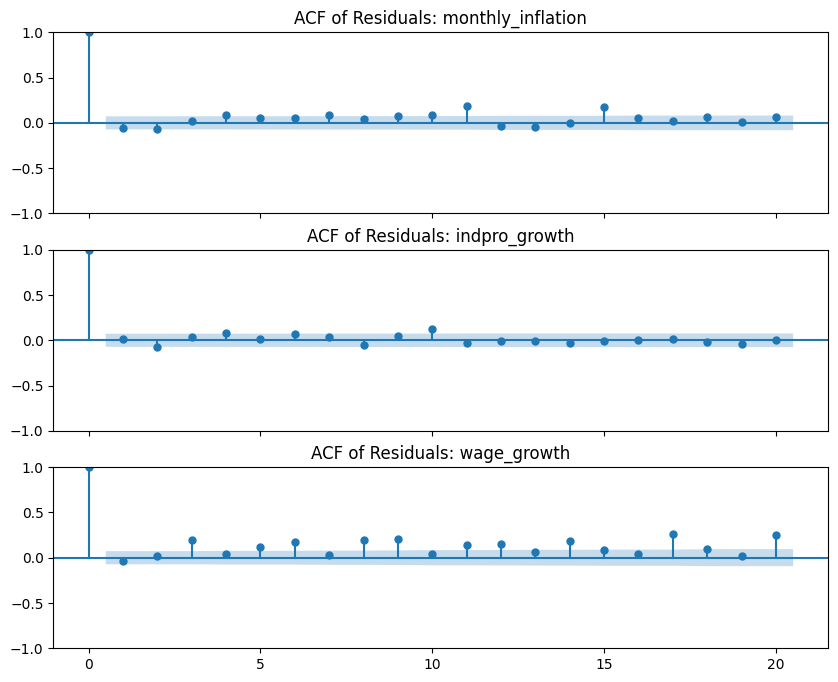

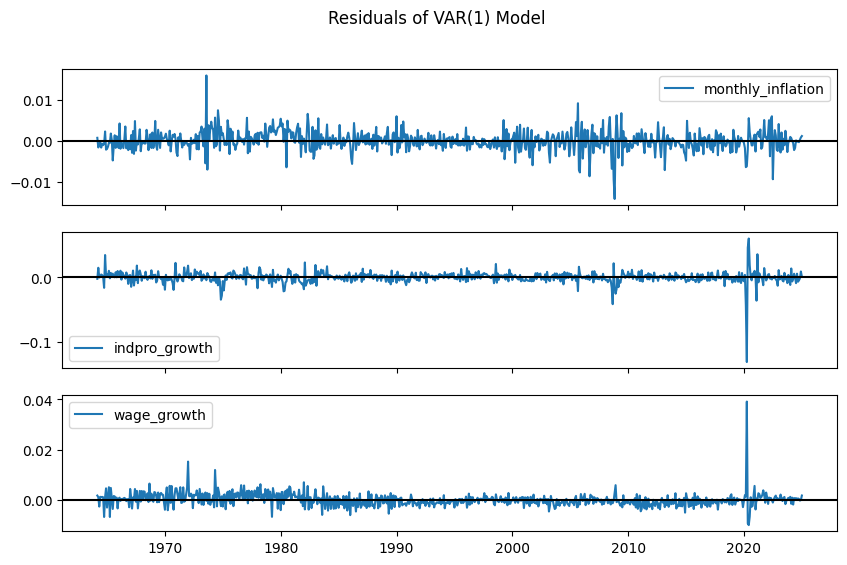

In [263]:
#residual analysis
residuals = var_results.resid

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(residuals.columns):
    plot_acf(residuals[col], lags=20, ax=axes[i]) 
    axes[i].set_title(f"ACF of Residuals: {col}")

fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
for i, col in enumerate(residuals.columns):
    axes[i].plot(residuals.index, residuals[col], label=f"{col}")
    axes[i].axhline(y=0, color="black")
    axes[i].legend()

plt.suptitle("Residuals of VAR(1) Model")
plt.show()

Q3 (b)
From residual analysis, we see that there appears to be minimal remaining systematic autocorrelation or stucture in the residuals, so our model fits reasonably well

In [264]:
#eigenvalues for slope matrix
var_results.params

B_matrix = var_results.coefs[0] 
B_eigenvals = np.linalg.eigvals(B_matrix)

print(f"Eigenvalues:{B_eigenvals}")

Eigenvalues:[ 0.646927   -0.02317015  0.26945353]


Q3 (c)
Since we see that all the eigenvalues are inside the unit circle, the process is stationary and it is thus likely that shocks will be absorbed relatively quickly

Q4

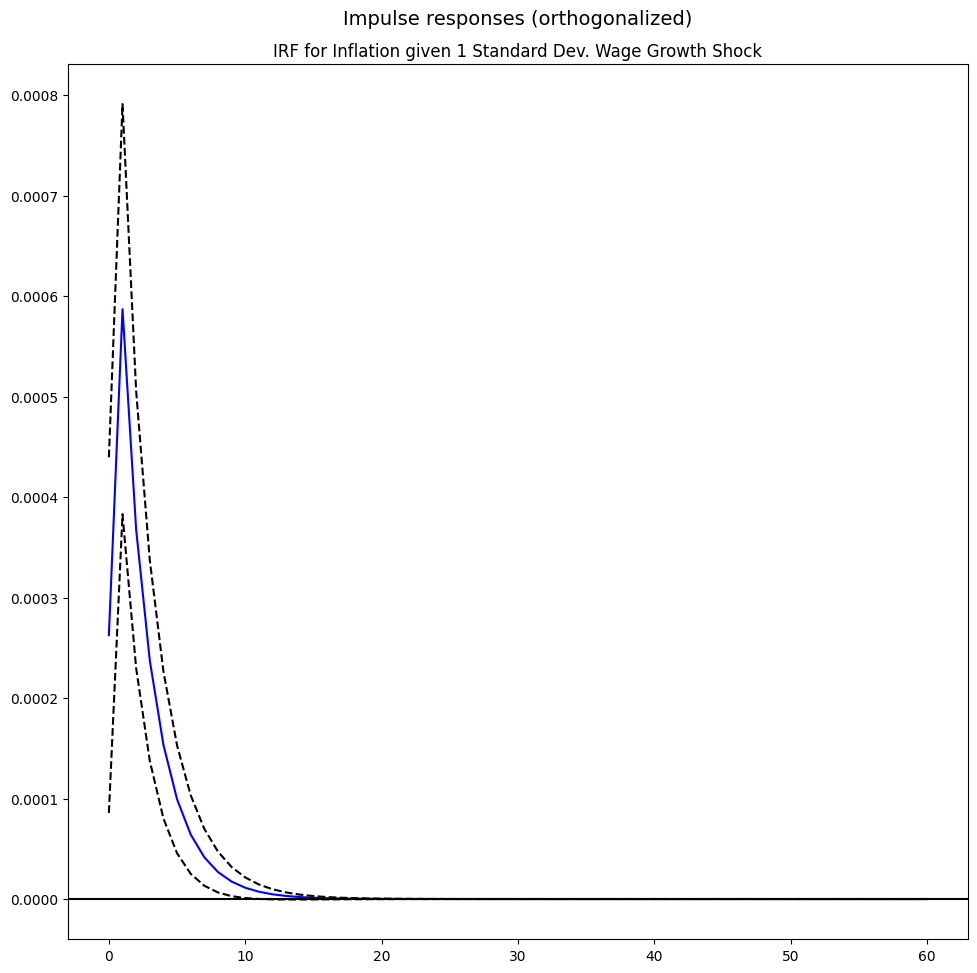

In [265]:
#build IRF out through 60 months for inflation
#choose ordering for shocks to propogate
shock_order = ['wage_growth', 'indpro_growth', 'monthly_inflation']

var_data_reordered = trivar_df[shock_order]

#re-estimate VAR
var_model = VAR(var_data_reordered)
var_results = var_model.fit(maxlags=1)

irf_macro = var_results.irf(60) 

#IRF for inflation given a 1 std wage shock 
irf_macro.plot(orth=True, impulse='wage_growth', response='monthly_inflation')
plt.title("IRF for Inflation given 1 Standard Dev. Wage Growth Shock")
plt.show()

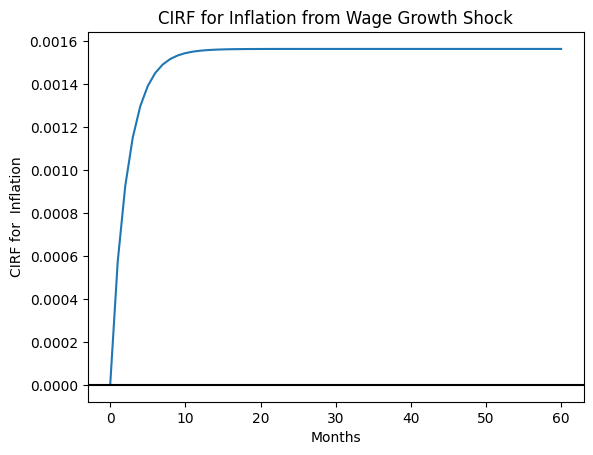

In [266]:
#build CIRF
irf_values = irf_macro.orth_irfs[:, shock_order.index('wage_growth'), shock_order.index('monthly_inflation')]

cirf_values = np.cumsum(irf_values)
time_steps = np.arange(len(cirf_values)) 

plt.plot(time_steps, cirf_values)
plt.axhline(0, color='black')
plt.xlabel("Months")
plt.ylabel("CIRF for  Inflation")
plt.title("CIRF for Inflation from Wage Growth Shock")
plt.show()

Q4 (a)
We see that the IRF for inflation given a wage growth shock has a quick upwards movement, but quickly returns to zero. This suggests that inflation increases in response to a spike in wage growth. Intuititvely, this makes sense as workers who have a higher wage are likely to spend more, which would drive up inflation. Also, higher wages means firms have larger production costs and therefore might impose higher prices on consumers. 

We see that the CIRF is concave-down increasing; it seems to converge to a small positive value. This would indicate that wage shocks might permanently drive inflation upwards.

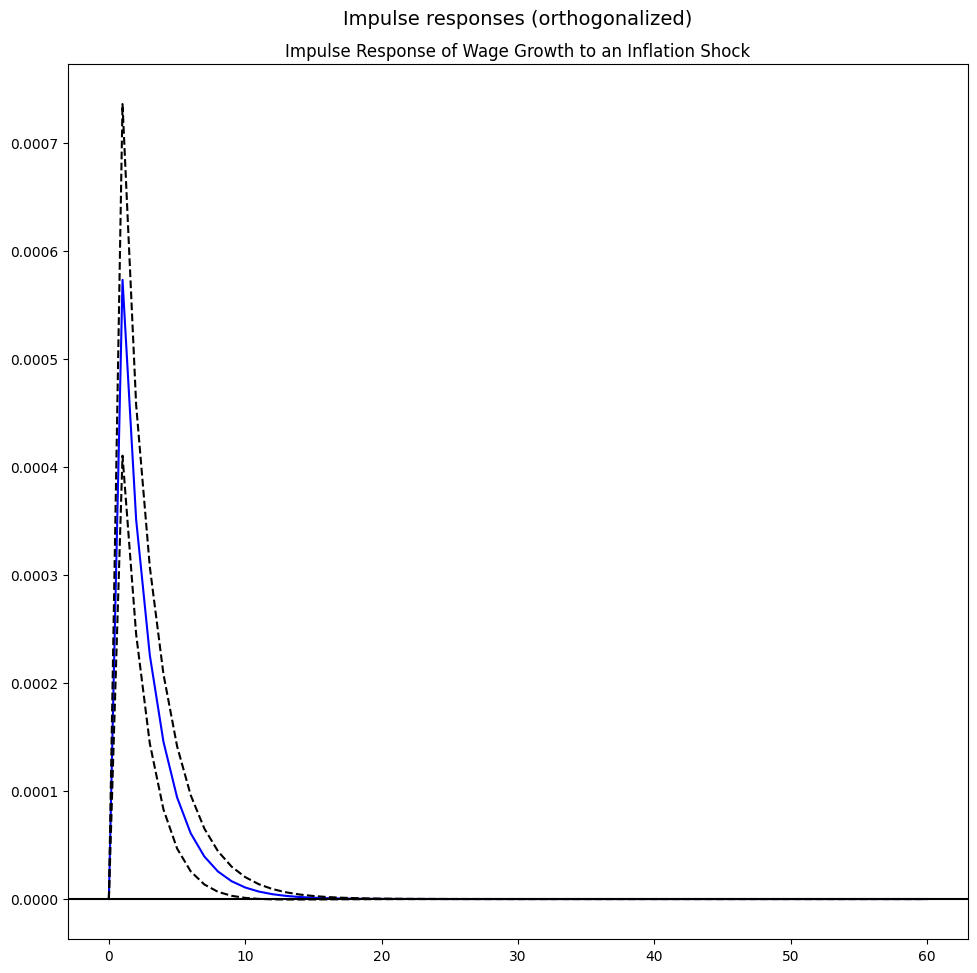

In [267]:
#IRF for wage growth following from inflation shock
irf_macro.plot(orth=True, impulse='monthly_inflation', response='wage_growth')
plt.title("Impulse Response of Wage Growth to an Inflation Shock")
plt.show()

In [268]:
#verify that the raw values are positive
irf_values = irf_macro.orth_irfs[:, shock_order.index('monthly_inflation'), shock_order.index('wage_growth')]
print("Impulse Response of Wage Growth to an Inflation Shock:")
for t, value in enumerate(irf_values):
    print(f"Month {t}: {value:.6f}")

Impulse Response of Wage Growth to an Inflation Shock:
Month 0: 0.000263
Month 1: 0.000587
Month 2: 0.000368
Month 3: 0.000237
Month 4: 0.000153
Month 5: 0.000099
Month 6: 0.000064
Month 7: 0.000042
Month 8: 0.000027
Month 9: 0.000017
Month 10: 0.000011
Month 11: 0.000007
Month 12: 0.000005
Month 13: 0.000003
Month 14: 0.000002
Month 15: 0.000001
Month 16: 0.000001
Month 17: 0.000001
Month 18: 0.000000
Month 19: 0.000000
Month 20: 0.000000
Month 21: 0.000000
Month 22: 0.000000
Month 23: 0.000000
Month 24: 0.000000
Month 25: 0.000000
Month 26: 0.000000
Month 27: 0.000000
Month 28: 0.000000
Month 29: 0.000000
Month 30: 0.000000
Month 31: 0.000000
Month 32: 0.000000
Month 33: 0.000000
Month 34: 0.000000
Month 35: 0.000000
Month 36: 0.000000
Month 37: 0.000000
Month 38: 0.000000
Month 39: 0.000000
Month 40: 0.000000
Month 41: 0.000000
Month 42: 0.000000
Month 43: 0.000000
Month 44: 0.000000
Month 45: 0.000000
Month 46: 0.000000
Month 47: 0.000000
Month 48: 0.000000
Month 49: 0.000000
Month

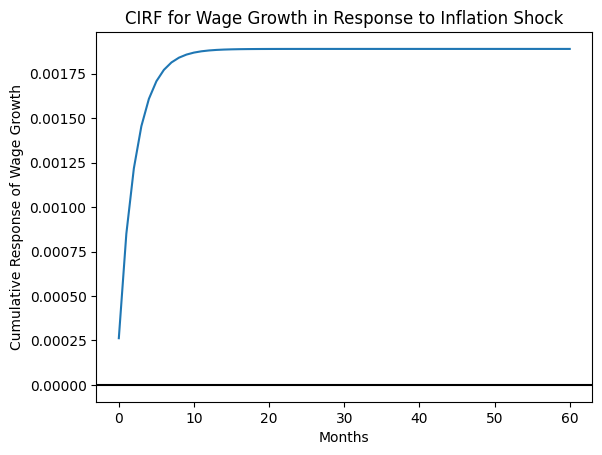

In [269]:
#build CIRF for wage growth in response to inflation shock
cirf_values = np.cumsum(irf_values)

plt.plot(range(len(cirf_values)), cirf_values)
plt.axhline(0, color='black')
plt.xlabel("Months")
plt.ylabel("Cumulative Response of Wage Growth")
plt.title("CIRF for Wage Growth in Response to Inflation Shock")
plt.show()

Q4 (b)
We see that the IRF has a brief spike upwards, but quickly returns to zero. Also, the CIRF is again concave-down increasing. These facts suggest our conclusions parallel those for wages impacting inflation. An inflation shock is likely to drive up wages, and the CIRF suggests these effects can be long-lasting.

Q4 (c)
As outlined before, it seems like an increase in wages will lead to an initial increase in inflation; the effect is strongest in the first few months. It will eventually decline, but will likely have a long-lasting (>5 years) impact.

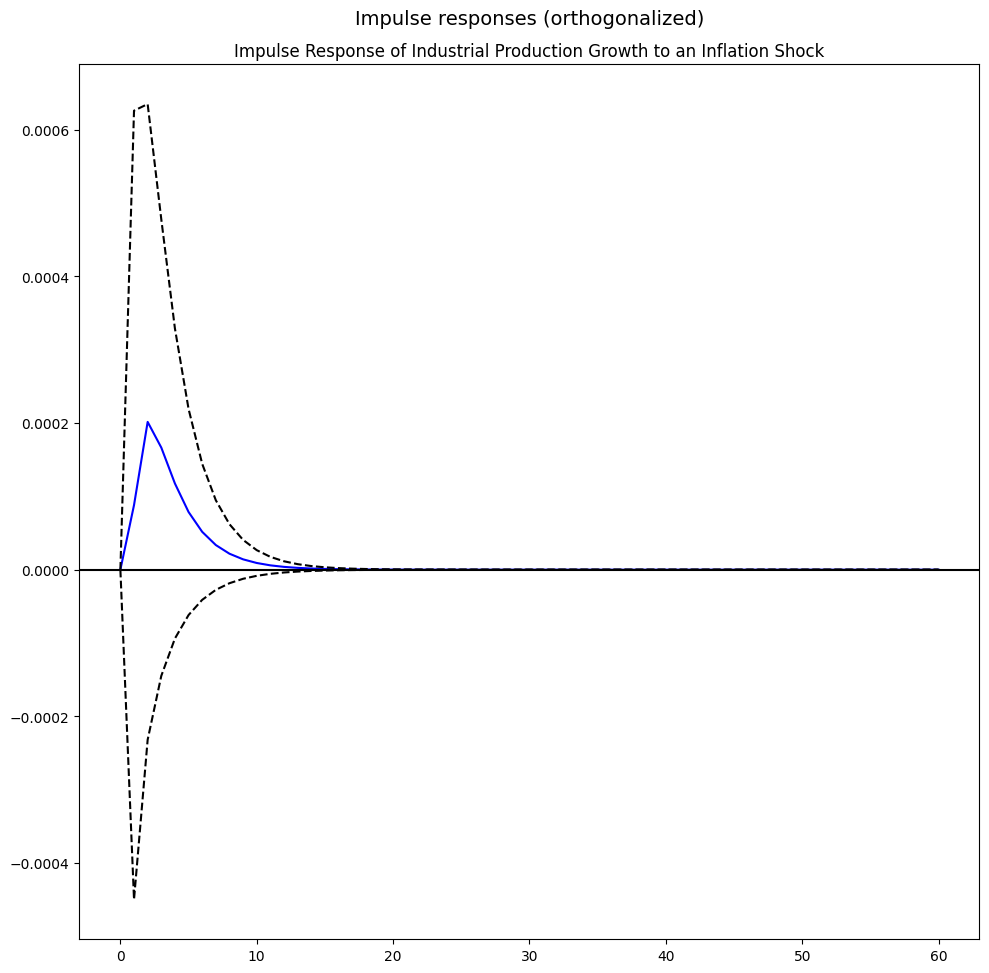

In [270]:
#IRF for industrial production in response to inflation shock
irf_macro.plot(orth=True, impulse='monthly_inflation', response='indpro_growth')
plt.title("Impulse Response of Industrial Production Growth to an Inflation Shock")
plt.show()

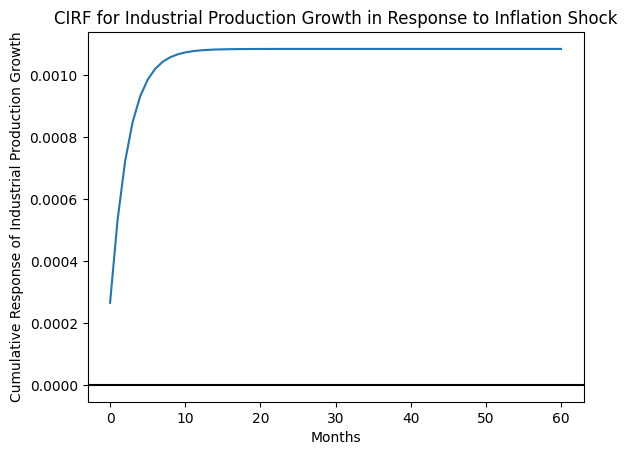

In [271]:
#build CIRF for industrial production in response to inflation shock
irf_values2 = irf_macro.orth_irfs[:, shock_order.index('monthly_inflation'), shock_order.index('indpro_growth')]

cirf_values2 = np.cumsum(irf_values2)

plt.plot(range(len(cirf_values2)), cirf_values2)
plt.axhline(0, color='black')
plt.xlabel("Months")
plt.ylabel("Cumulative Response of Industrial Production Growth")
plt.title("CIRF for Industrial Production Growth in Response to Inflation Shock")
plt.show()

Q4 (d)
The IRF has a brief spike upwards, but this spike is not as sharp and high as previous IRFs we've seen. It makes sense then that the CIRF is concave-down increasing. Thus, we find that inflation shocks impact industrial production growth similar to previous shocks: we expect a brief movement upwards, decaying after a year or so, and then settling on a permanent impact.